# Dala Loading 

In [2]:
import pandas as pd

data = pd.read_csv(r"D:\Placement Preparation\Self Online Internship\Iris Flower Detection\Iris.csv")

print("Iris Dataset Loaded Successfully:")
data.head()


Iris Dataset Loaded Successfully:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Exploration

Dataset Shape: (150, 6)

Missing Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dataset Summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Unique Species:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Species Distribution:
Species
Iris-setosa        50
Iris-vers

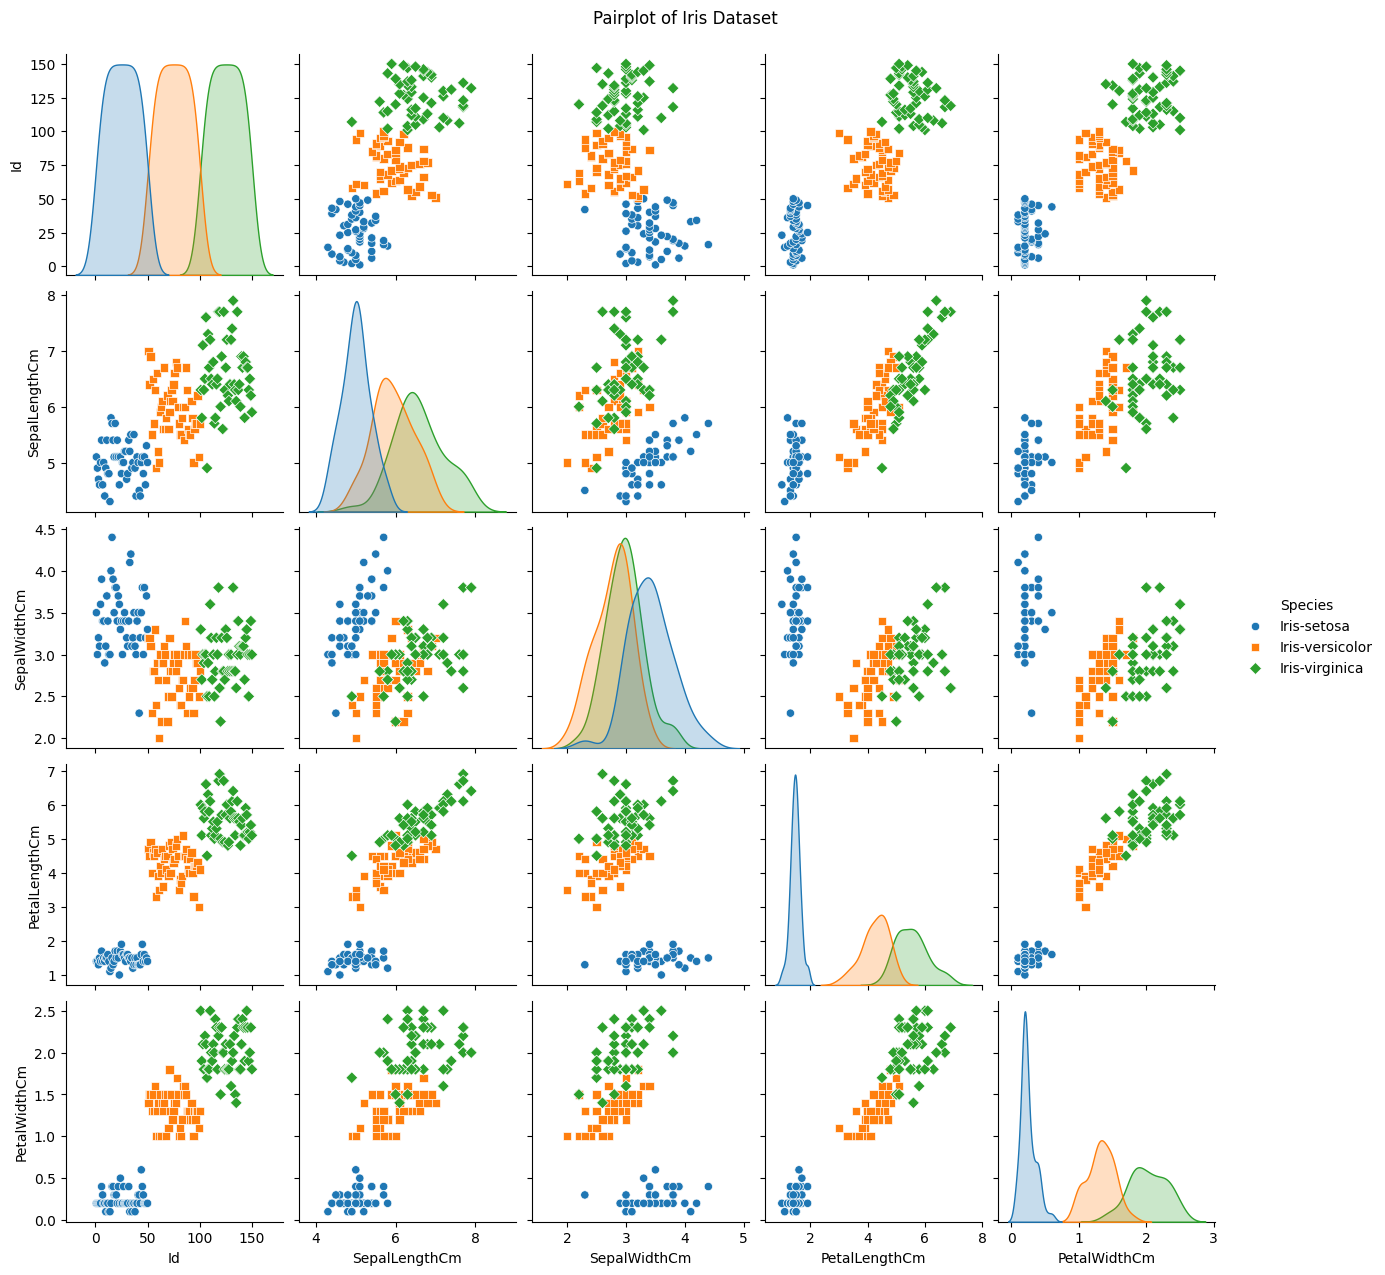

In [6]:
print("Dataset Shape:", data.shape)

print("\nMissing Values:")
print(data.isnull().sum())

print("\nDataset Summary:")
print(data.describe())

print("\nUnique Species:")
print(data['Species'].unique())

print("\nSpecies Distribution:")
print(data['Species'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='Species', diag_kind='kde', markers=['o', 's', 'D'])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()



# Feature Engineering

In [7]:
data = data.drop(columns=['Id'])

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

print("Dataset After Feature Engineering:")
print(data.head())

species_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nSpecies Mapping:", species_mapping)


Dataset After Feature Engineering:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

Species Mapping: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


# Model Selection

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X = data.drop(columns=['Species'])
y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))



Logistic Regression Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Decision Tree Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Random Forest Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00 

# Model Training

In [9]:

best_model = models['Random Forest']  

best_model.fit(X, y)

y_pred_full = best_model.predict(X)

accuracy_full = accuracy_score(y, y_pred_full)
print(f"\nFinal Model ({best_model.__class__.__name__}) Accuracy on Full Dataset: {accuracy_full * 100:.2f}%")
print(classification_report(y, y_pred_full))

import joblib
joblib.dump(best_model, 'iris_flower_model.pkl')
print("\nModel has been saved as 'iris_flower_model.pkl'.")



Final Model (RandomForestClassifier) Accuracy on Full Dataset: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


Model has been saved as 'iris_flower_model.pkl'.


# Model Evaluation


Final Model Accuracy on Full Dataset: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



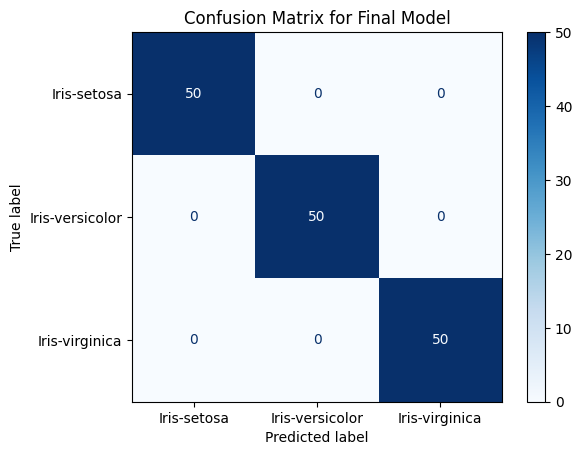

In [11]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

y_pred_final = best_model.predict(X)

accuracy = accuracy_score(y, y_pred_final)
print(f"\nFinal Model Accuracy on Full Dataset: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y, y_pred_final))

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred_final)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix for Final Model")
plt.show()
